## CS5344 Project

### Data preprocessing

In [7]:
from src.utils import *
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [8]:
df = pd.read_csv("data/training.1600000.processed.noemoticon.csv", encoding = 'latin', header=None)
df.head()

df.columns = ['label', 'id', 'date', 'query', 'user', 'text']
print(np.unique(df['label']))
print(np.unique(df['query']))
df = df[['text', 'label']]
df['label'][df['label'] == 4] = 1
print(np.sum(df.isnull().any(axis=1)))

[0 4]
['NO_QUERY']
0


- Removing Hashtags, Mentions, Hyperlinks
- Removeing Non-alphabetic characters
- Removing Stopwords
- Stemming
- Lemmatization

In [9]:
%%time
df = preprocess(df)

CPU times: user 5min 46s, sys: 5.51 s, total: 5min 52s
Wall time: 6min 6s


#### Train/Test Split

In [10]:
X, y = df['text'].to_numpy(), df['label'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### TF-IDF Vectorizing

In [11]:
%%time
vectoriser=TfidfVectorizer(ngram_range=(1,2),max_features=50000)
vectoriser.fit(X_train)

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

CPU times: user 1min 8s, sys: 2.76 s, total: 1min 11s
Wall time: 1min 12s


#### Model Evaluation

### Model 1 Logistic Regression

              precision    recall  f1-score   support

           0       0.80      0.76      0.78    159815
           1       0.77      0.81      0.79    160185

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000

CPU times: user 1min 7s, sys: 9.75 s, total: 1min 17s
Wall time: 16.6 s


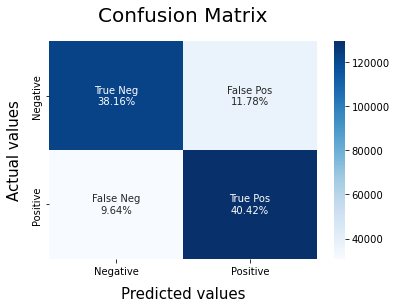

In [14]:
%%time
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
model_evaluation(model_lr, X_test, y_test)

### Model 2 Decision Tree

In [15]:
%%time
model_dtc = DecisionTreeClassifier(max_depth=50)
model_dtc.fit(X_train, y_train)


CPU times: user 8min 48s, sys: 1.78 s, total: 8min 50s
Wall time: 8min 51s


DecisionTreeClassifier(max_depth=50)

              precision    recall  f1-score   support

           0       0.78      0.49      0.60    159815
           1       0.63      0.86      0.73    160185

    accuracy                           0.67    320000
   macro avg       0.70      0.67      0.66    320000
weighted avg       0.70      0.67      0.66    320000



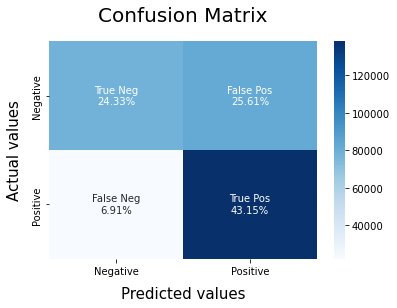

In [16]:
model_evaluation(model_dtc, X_test, y_test)